In [9]:
import os

In [10]:
!pip install findspark
!pip install pyspark
import findspark
from pyspark.sql import SparkSession

In [11]:
!pip install pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
import csv
from pyspark.sql.types import *
from pyspark.sql.functions import format_number, when
import pyspark.sql.functions as F

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [13]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [15]:
crime_data = pd.read_csv('/content/Chicago_Crime_Processed_Data.csv')

In [16]:
crime_data.head()

,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week,primary_type_grouped,zone,Count_CrimeType_Column
0,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,2015,41.815117,-87.670000,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,South,1640154.0
1,0870,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,2015,41.895080,-87.765400,9,4,11,Friday,THEFT,North,2327482.0
2,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,2015,41.937406,-87.716650,9,5,12,Saturday,NARCOTIC_OFFENSE,West,661033.0
3,0560,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,2015,41.881903,-87.755121,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,North,1640154.0
4,0610,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,2015,41.744379,-87.658431,9,5,10,Saturday,THEFT,South,2327482.0


In [17]:
crime_data.columns

Index(['IUCR', 'Description', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'Year',
       'Latitude', 'Longitude', 'Month', 'Day_num', 'Time', 'day_of_week',
       'primary_type_grouped', 'zone', 'Count_CrimeType_Column'],
      dtype='object')

In [18]:
primaryVisualizeDF = crime_data.groupby('primary_type_grouped').size()

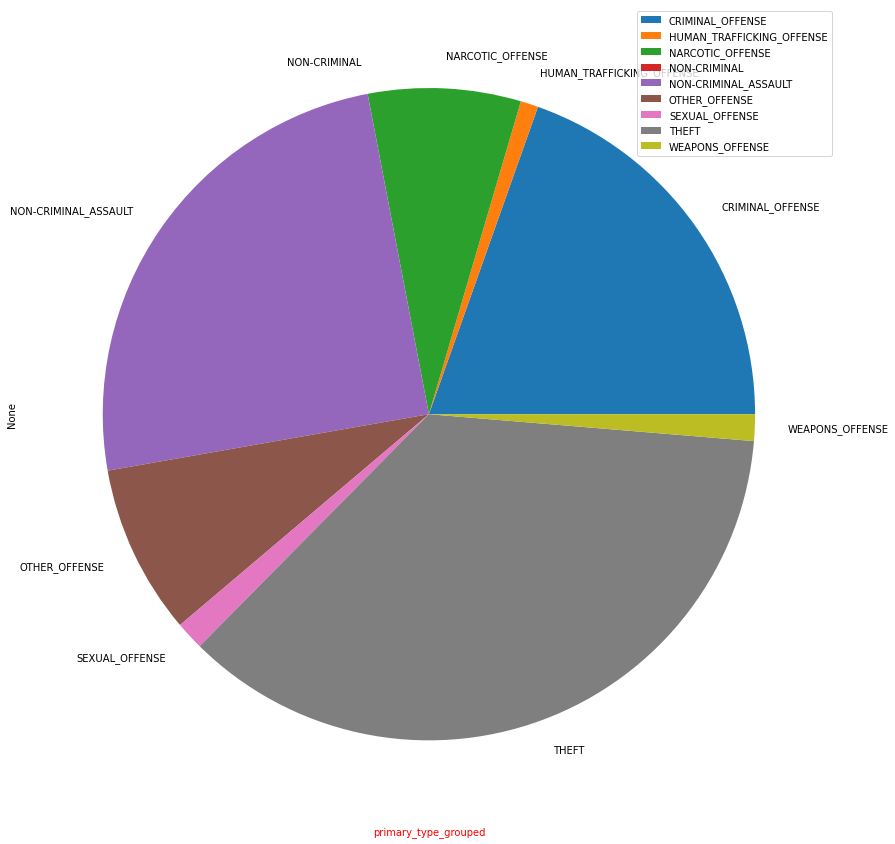

In [19]:
primaryVisualizeDF.plot.pie(figsize = (15,15))
plt.xlabel('primary_type_grouped', fontsize=10, color = 'red')
plt.legend()

In [20]:
data = crime_data.replace(to_replace='None', value=np.nan).dropna()

In [21]:
# create an instance of label encoder for categorical variables
labelEncoder = LabelEncoder()

In [22]:
primaryEncoded = labelEncoder.fit_transform(data['District'])
primaryEncoded

array([ 8, 13, 12, ..., 19, 14, 10])

In [23]:
data['District'] = primaryEncoded

In [24]:
# create an instance of label encoder for categorical variables
labelEncoder2 = LabelEncoder()

In [25]:
locDiscEncoded = labelEncoder2.fit_transform(data['Ward'])
locDiscEncoded

array([11, 28, 34, ..., 20, 44, 23])

In [26]:
data['Ward'] = locDiscEncoded

In [27]:
# create an instance of label encoder for categorical variables
labelEncoder3 = LabelEncoder()

In [28]:
communityEncoded = labelEncoder3.fit_transform(data['Community Area'])
communityEncoded

array([60, 24, 20, ..., 72, 10, 25])

In [29]:
data['Community Area'] = locDiscEncoded

In [30]:
# create an instance of label encoder for categorical variables
labelEncoder4 = LabelEncoder()

In [31]:
latitudeEncoded = labelEncoder4.fit_transform(data['Latitude'])
latitudeEncoded

array([31212, 48612, 60668, ...,  6143, 68843, 40861])

In [32]:
data['Latitude'] = locDiscEncoded

In [33]:
# create an instance of label encoder for categorical variables
labelEncoder5 = LabelEncoder()

In [34]:
longitudeEncoded = labelEncoder5.fit_transform(data['Longitude'])
longitudeEncoded

array([36706,  4626, 18403, ..., 51955,  3954, 11340])

In [35]:
data['Longitude'] = locDiscEncoded

In [36]:
# create an instance of label encoder for categorical variables
labelEncoder6 = LabelEncoder()

In [37]:
monthEncoded = labelEncoder6.fit_transform(data['Month'])
monthEncoded

array([ 8,  8,  8, ..., 11, 11, 11])

In [38]:
data['Month'] = locDiscEncoded

In [39]:
# create an instance of label encoder for categorical variables
labelEncoder7 = LabelEncoder()

In [40]:
yearEncoded = labelEncoder7.fit_transform(data['Year'])
yearEncoded

array([8, 8, 8, ..., 8, 8, 8])

In [41]:
data['Year'] = locDiscEncoded

In [42]:
# create an instance of label encoder for categorical variables
labelEncoder8 = LabelEncoder()

In [43]:
timeEncoded = labelEncoder8.fit_transform(data['Time'])
timeEncoded

array([13, 11, 12, ...,  0, 23,  0])

In [44]:
data['Time'] = locDiscEncoded

In [45]:
# create an instance of label encoder for categorical variables
labelEncoder9 = LabelEncoder()

In [46]:
zoneEncoded = labelEncoder9.fit_transform(data['zone'])
zoneEncoded

array([2, 1, 3, ..., 3, 1, 2])

In [47]:
data['zone'] = locDiscEncoded

In [48]:
# create an instance of label encoder for categorical variables
labelEncoder10 = LabelEncoder()

In [49]:
locationDescriptionEncoded = labelEncoder10.fit_transform(data['Location Description'])
locationDescriptionEncoded

array([ 89,  44, 103, ...,  89,  93,  61])

In [50]:
data['Location Description'] = locDiscEncoded

In [51]:
# create an instance of label encoder for categorical variables
labelEncoder11 = LabelEncoder()

In [52]:
beatEncoded = labelEncoder11.fit_transform(data['Beat'])
beatEncoded

array([109, 170, 159, ..., 247, 185, 138])

In [53]:
data['Beat'] = locDiscEncoded

In [54]:
from sklearn.decomposition import PCA #use PCA to combine features

In [55]:
location = data[['Latitude','Longitude']]
pca = PCA(n_components=1,random_state=123)

In [56]:
loc = pca.fit_transform(location)

In [57]:
data['Location'] = loc

In [58]:
data.head(5)


,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week,primary_type_grouped,zone,Count_CrimeType_Column,Location
0,0486,DOMESTIC BATTERY SIMPLE,11,False,True,11,8,11,11,08B,11,11,11,11,5,11,Saturday,NON-CRIMINAL_ASSAULT,11,1640154.0,-15.396419
1,0870,POCKET-PICKING,28,False,False,28,13,28,28,06,28,28,28,28,4,28,Friday,THEFT,28,2327482.0,8.645212
2,2023,POSS: HEROIN(BRN/TAN),34,True,False,34,12,34,34,18,34,34,34,34,5,34,Saturday,NARCOTIC_OFFENSE,34,661033.0,17.130493
3,0560,SIMPLE,27,False,True,27,13,27,27,08A,27,27,27,27,5,27,Saturday,NON-CRIMINAL_ASSAULT,27,1640154.0,7.230998
4,0610,FORCIBLE ENTRY,20,False,False,20,5,20,20,05,20,20,20,20,5,20,Saturday,THEFT,20,2327482.0,-2.668496


In [59]:
#taking a fraction of data
data_sample = data.sample(frac=0.1, random_state=123)

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

In [61]:
corelation = data.corr()
corelation

,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,Month,Day_num,Time,zone,Count_CrimeType_Column,Location
Location Description,1.000000,-0.013191,-0.067747,1.000000,0.680539,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.007841,1.000000,1.000000,0.043893,1.000000
Arrest,-0.013191,1.000000,-0.045976,-0.013191,-0.013272,-0.013191,-0.013191,-0.013191,-0.013191,-0.013191,-0.013191,0.003287,-0.013191,-0.013191,-0.372638,-0.013191
Domestic,-0.067747,-0.045976,1.000000,-0.067747,-0.049795,-0.067747,-0.067747,-0.067747,-0.067747,-0.067747,-0.067747,0.000963,-0.067747,-0.067747,-0.092770,-0.067747
Beat,1.000000,-0.013191,-0.067747,1.000000,0.680539,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.007841,1.000000,1.000000,0.043893,1.000000
District,0.680539,-0.013272,-0.049795,0.680539,1.000000,0.680539,0.680539,0.680539,0.680539,0.680539,0.680539,-0.005732,0.680539,0.680539,0.014248,0.680539
Ward,1.000000,-0.013191,-0.067747,1.000000,0.680539,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.007841,1.000000,1.000000,0.043893,1.000000
Community Area,1.000000,-0.013191,-0.067747,1.000000,0.680539,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.007841,1.000000,1.000000,0.043893,1.000000
Year,1.000000,-0.013191,-0.067747,1.000000,0.680539,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.007841,1.000000,1.000000,0.043893,1.000000
Latitude,1.000000,-0.013191,-0.067747,1.000000,0.680539,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.007841,1.000000,1.000000,0.043893,1.000000
Longitude,1.000000,-0.013191,-0.067747,1.000000,0.680539,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.007841,1.000000,1.000000,0.043893,1.000000


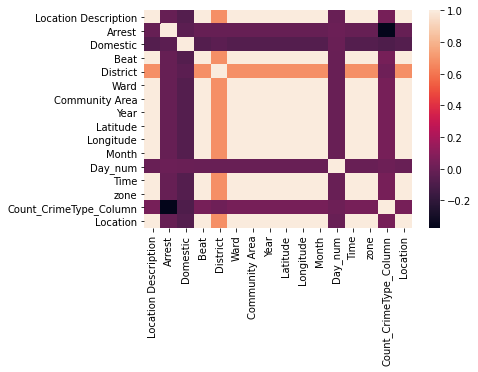

In [62]:
sns.heatmap(corelation)

In [63]:
selected_columns = ['District','Ward','Community Area','Latitude','Longitude','Month','Year','Time','zone','Location Description','Beat']

In [64]:
from sklearn.model_selection import train_test_split
X_train_gs, X_test, y_train_gs, y_test = train_test_split(data[selected_columns], data['primary_type_grouped'], test_size=0.2) # 80% training and 20% test

In [65]:
knn_5 = KNeighborsClassifier(n_neighbors=5) 
knn_5.fit(X_train_gs,y_train_gs)
pred_train = knn_5.predict(X_train_gs)
pred_i = knn_5.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train_gs, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Test accuracy  0.30854559488366967
Accuracy  0.311736426586689
F1 score  0.2884678781668847


In [66]:
error_rate = []

krange = range(10,50,5)
for i in krange:
 
 knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights = 'uniform',n_jobs= -1) # haversine - if only lat long
 knn.fit(X_train_gs,y_train_gs)
 pred_train = knn.predict(X_train_gs)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))
 print('Neighbours ',i)
 print('Test accuracy ', metrics.accuracy_score(y_train_gs, pred_train))
 print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
 print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Neighbours  10
Test accuracy  0.3340500606461572
Accuracy  0.3352004586953645
F1 score  0.3044715862857333
Neighbours  15
Test accuracy  0.34305877163965154
Accuracy  0.3441097340448992
F1 score  0.29632940340114866
Neighbours  20
Test accuracy  0.3511743301356269
Accuracy  0.3532836413355092
F1 score  0.2968131587240939
Neighbours  25
Test accuracy  0.3513617818943654
Accuracy  0.3536364839236096
F1 score  0.29596165724580664
Neighbours  30
Test accuracy  0.3516043665233212
Accuracy  0.3514312177479822
F1 score  0.29114263394411405
Neighbours  35
Test accuracy  0.3534788841107068
Accuracy  0.35491553830547345
F1 score  0.2981270254137934
Neighbours  40
Test accuracy  0.3626309405667659
Accuracy  0.3637807083314956
F1 score  0.29309324026940287
Neighbours  45
Test accuracy  0.3615503363105083
Accuracy  0.36373660300798305
F1 score  0.29181760056378575


Text(0, 0.5, 'Error Rate')

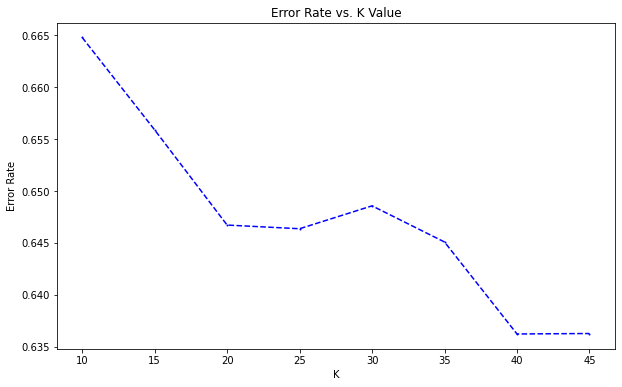

In [67]:
plt.figure(figsize=(10,6))

plt.plot(krange,error_rate, color= 'blue', linestyle= 'dashed', marker= 'o', markerfacecolor='red', markersize=1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [69]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [70]:
grid_params = {
    'weights' : ['uniform', 'distance'],
    'metric' : ['manhattan','jaccard'] #haversine - if only lat long
}

In [71]:
randomSearch = RandomizedSearchCV(
    KNeighborsClassifier(25),
    grid_params,
    verbose = 1,
    cv =3,
    random_state = 123
    )

In [72]:
rs_results = randomSearch.fit(X_train_gs, y_train_gs)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 10.5min finished


In [73]:
rs_results.best_score_

0.34345572830521554

In [74]:
rs_results.best_params_

{'metric': 'manhattan', 'weights': 'distance'}

In [75]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [76]:
# Oversample 'Majority'
sm = SMOTE('minority', random_state=123)

In [77]:
X_train_res, y_train_res = sm.fit_sample(X_train_gs, y_train_gs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [78]:
#convert back to Dataframe
X_train_updated = pd.DataFrame(X_train_res, columns= selected_columns)
y_train_updated = pd.Series(y_train_res)

In [79]:
target_counts = y_train_updated.value_counts()
target_counts

HUMAN_TRAFFICKING_OFFENSE    32754
THEFT                        32754
NON-CRIMINAL_ASSAULT         22315
CRIMINAL_OFFENSE             17855
OTHER_OFFENSE                 7645
NARCOTIC_OFFENSE              6888
SEXUAL_OFFENSE                1242
WEAPONS_OFFENSE               1192
dtype: int64

In [80]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [81]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [82]:
pred_i = knn.predict(X_test)

In [83]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.23102368455872624
F1 score  0.23947552172036798


In [84]:
from imblearn.under_sampling import ClusterCentroids

In [85]:
# Undersample 'Majority'
cc = ClusterCentroids(sampling_strategy = 'majority')

In [86]:
X_cc, y_cc = cc.fit_sample(X_train_gs, y_train_gs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:156: ConvergenceWarning: Number of distinct clusters (140) found smaller than n_clusters (799). Possibly due to duplicate points in X.
  self.estimator_.fit(X[y == target_class])
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [87]:
#convert back to Dataframe
X_train_updated = pd.DataFrame(X_cc, columns= selected_columns)
y_train_updated = pd.Series(y_cc)

In [88]:
target_counts = y_train_updated.value_counts()
target_counts

NON-CRIMINAL_ASSAULT         22315
CRIMINAL_OFFENSE             17855
OTHER_OFFENSE                 7645
NARCOTIC_OFFENSE              6888
SEXUAL_OFFENSE                1242
WEAPONS_OFFENSE               1192
THEFT                          799
HUMAN_TRAFFICKING_OFFENSE      799
dtype: int64

In [89]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [90]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [91]:
pred_i = knn.predict(X_test)

In [92]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.23441979446919242
F1 score  0.1662222137852824


In [93]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [94]:
# define oversampling strategy
over = RandomOverSampler(sampling_strategy= 'minority')

In [95]:
# fit and apply the transform
X_random, y_random = over.fit_resample(X_train_gs, y_train_gs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [96]:
#convert back to Dataframe
X_train_updated = pd.DataFrame(X_random, columns= selected_columns)
y_train_updated = pd.Series(y_random)

In [97]:
target_counts_random = y_train_updated.value_counts()
target_counts_random

HUMAN_TRAFFICKING_OFFENSE    32754
THEFT                        32754
NON-CRIMINAL_ASSAULT         22315
CRIMINAL_OFFENSE             17855
OTHER_OFFENSE                 7645
NARCOTIC_OFFENSE              6888
SEXUAL_OFFENSE                1242
WEAPONS_OFFENSE               1192
dtype: int64

In [98]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [99]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [100]:
pred_i = knn.predict(X_test)

In [101]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.25982446081242005
F1 score  0.24723923202493578


In [102]:
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy= 'majority')

In [103]:
# fit and apply the transform
X_train_updated, y_train_updated = under.fit_resample(X_train_gs, y_train_gs)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [104]:
y_train_updated = pd.Series(y_train_updated)
target_counts_random = y_train_gs.value_counts()
target_counts_random

THEFT                        32754
NON-CRIMINAL_ASSAULT         22315
CRIMINAL_OFFENSE             17855
OTHER_OFFENSE                 7645
NARCOTIC_OFFENSE              6888
SEXUAL_OFFENSE                1242
WEAPONS_OFFENSE               1192
HUMAN_TRAFFICKING_OFFENSE      799
Name: primary_type_grouped, dtype: int64

In [105]:
knn = KNeighborsClassifier(n_neighbors=25, metric='manhattan', weights = 'uniform')

In [106]:
knn.fit(X_train_updated,y_train_updated)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [107]:
pred_i = knn.predict(X_test)

In [108]:
print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))

Accuracy  0.253296872932563
F1 score  0.1740108568586419


In [109]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [110]:
#KNN with - 25 neighbours
knn = KNeighborsClassifier(25, metric='manhattan', weights = 'uniform',n_jobs= -1)

#random forest with 75 Decision Trees
rf = RandomForestClassifier(10, max_depth = 10, n_jobs= -1)

#Support Vector Classifier
svm = SVC(kernel = 'linear', random_state = 123, probability=True)

In [111]:
# can using previopusly trained KNN as well
knn.fit(X_train_gs,y_train_gs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=2,
                     weights='uniform')

In [112]:
rf.fit(X_train_gs,y_train_gs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [113]:
rf.score(X_test, y_test)

0.37815904379658627

In [114]:
#create a dictionary of our models
estimators=[('knn', knn), ('rf', rf), ('svm', svm)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')